In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
cores_vivas = sns.color_palette("bright")

Mounted at /content/drive


In [ ]:
cam4 = '/content/drive/MyDrive/Analises/2024/tipo_membro.csv'
dfm4 = pd.read_csv(cam4)

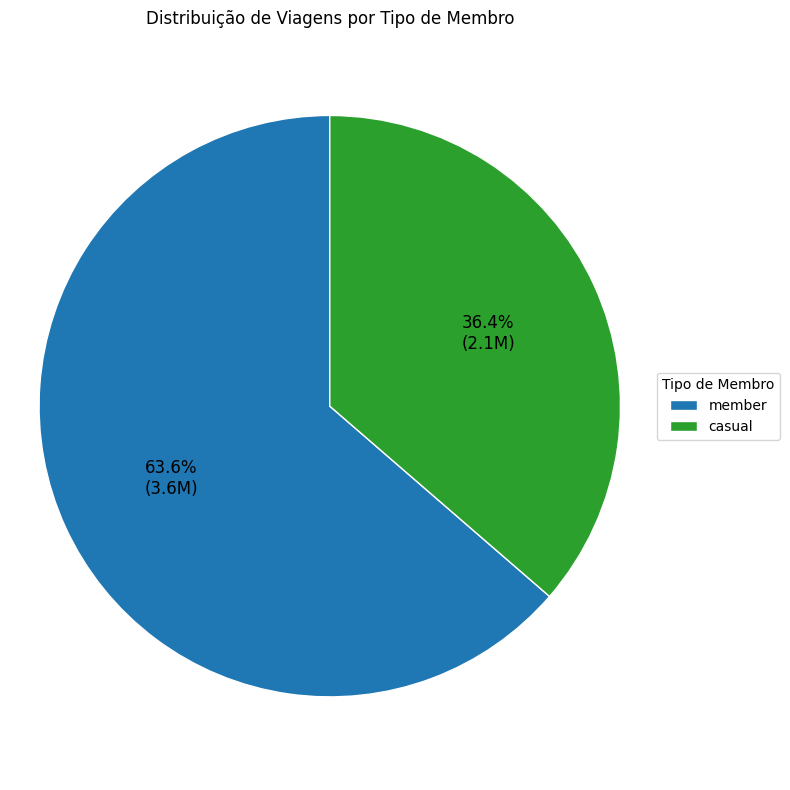

In [ ]:
# Dados
labels = dfm4['tipo_uso']
sizes = dfm4['total']

def func_pct_abs(pct, all_vals):
    absolute = pct / 100. * sum(all_vals)
    return f"{pct:.1f}%\n({absolute/1e6:.1f}M)"

# Plot
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=None,  # Labels na legenda
    autopct=lambda pct: func_pct_abs(pct, sizes),
    startangle=90,
    colors=['#1f77b4','#2ca02c'],
    wedgeprops={'edgecolor': 'white'},
    textprops={'fontsize': 12}
)

# Legenda fora do gráfico associando cor e tipo de membro
ax.legend(
    wedges,
    labels,
    title="Tipo de Membro",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

plt.title('Distribuição de Viagens por Tipo de Membro')
plt.axis('equal')  # Círculo perfeito
plt.tight_layout()
plt.show()

Estação de destino

In [ ]:
cd2 = '/content/drive/MyDrive/Analises/2024/estacao_destino.csv'
dfd4 = pd.read_csv(cd2)

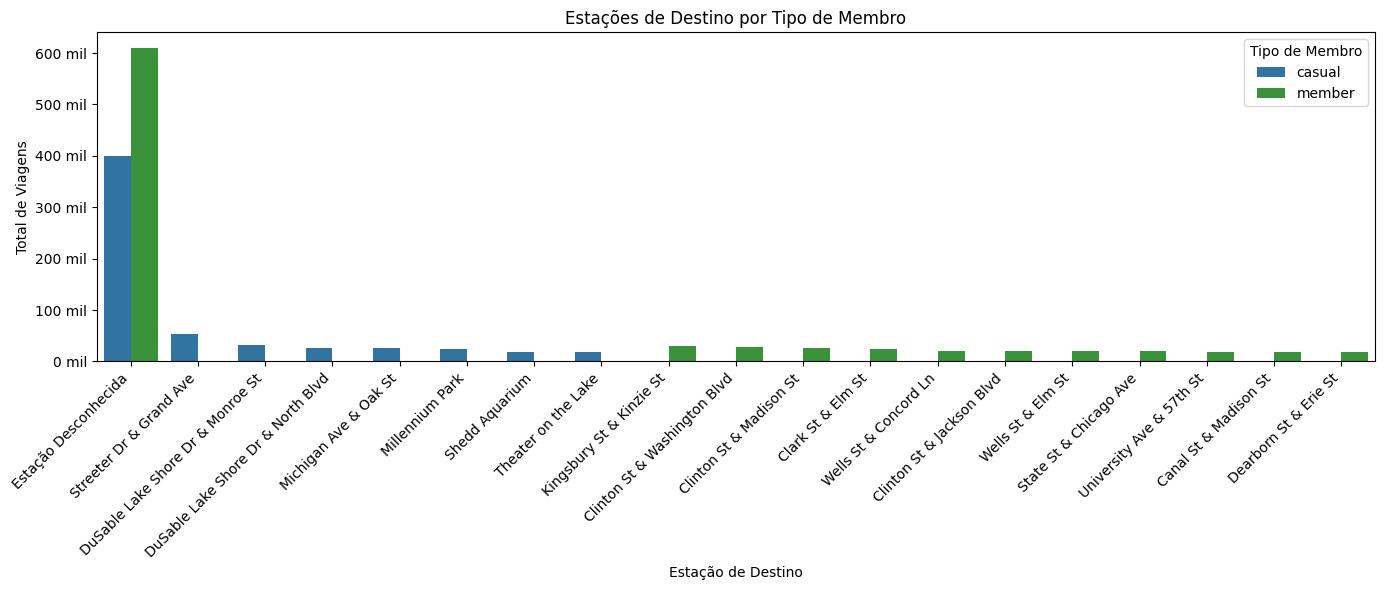

In [ ]:
plt.figure(figsize=(14, 6))

cores = {
    'member': '#2ca02c',  # verde
    'casual': '#1f77b4'   # azul
}

sns.barplot(
    data=dfd4,
    x='estacao_destino',
    y='total_viagens',
    hue='tipo_uso',
    palette=cores
)

plt.title('Estações de Destino por Tipo de Membro')
plt.xlabel('Estação de Destino')
plt.ylabel('Total de Viagens')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tipo de Membro')

formatter = FuncFormatter(lambda x, _: f'{int(x/1000)} mil')
plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

Estação de origem

In [ ]:
cdo = '/content/drive/MyDrive/Analises/2024/estação_origem.csv'
dfo4 = pd.read_csv(cdo)

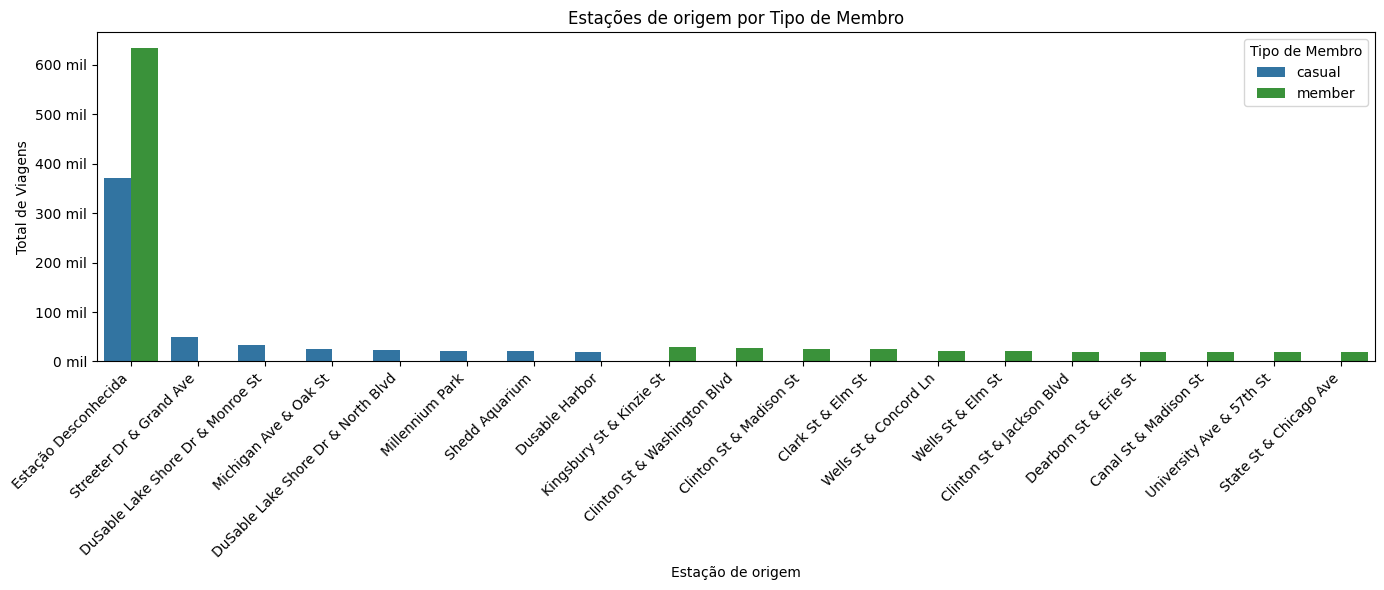

In [ ]:
plt.figure(figsize=(14, 6))

cores = {
    'member': '#2ca02c',  # verde
    'casual': '#1f77b4'   # azul
}


sns.barplot(
    data=dfo4,
    x='estacao_origem',
    y='total_viagens',
    hue='tipo_uso',
    palette=cores
)

plt.title('Estações de origem por Tipo de Membro')
plt.xlabel('Estação de origem')
plt.ylabel('Total de Viagens')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tipo de Membro')

formatter = FuncFormatter(lambda x, _: f'{int(x/1000)} mil')
plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

Horário de maior movimento

In [ ]:
cam_ho2 = '/content/drive/MyDrive/Analises/2024/horario_dia.csv'
dfh3 = pd.read_csv(cam_ho2)

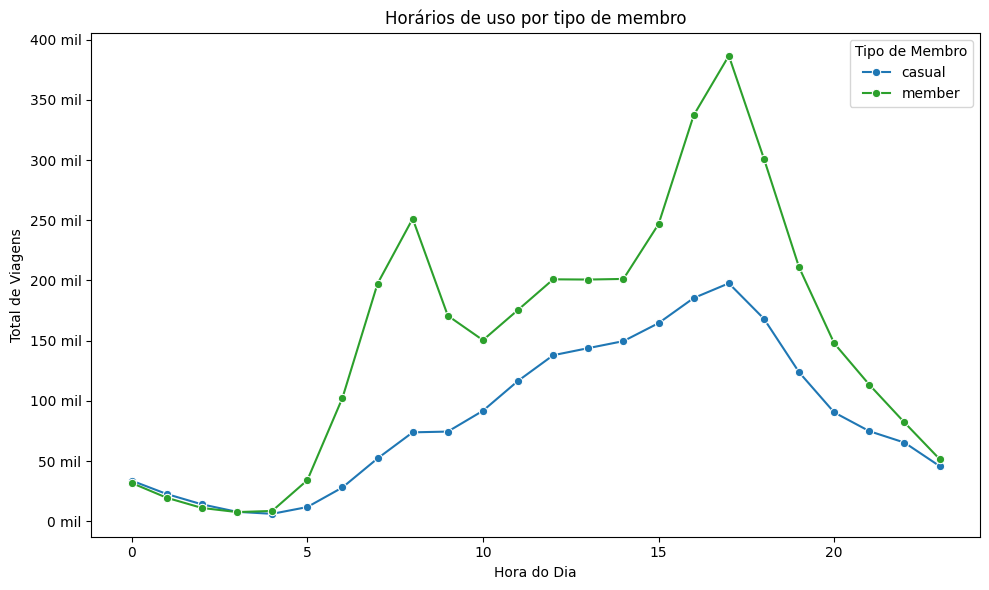

In [ ]:

#Desenho do gráfico
plt.figure(figsize=(10, 6))

cores = {
    'member': '#2ca02c',  # verde
    'casual': '#1f77b4'   # azul
}


sns.lineplot(
    data=dfh3,
    x='hora',
    y='total',
    hue='tipo_uso',
    marker='o',
    palette=cores,
    errorbar=None
)
plt.title('Horários de uso por tipo de membro')
plt.xlabel('Hora do Dia')
plt.ylabel('Total de Viagens')
plt.xticks(rotation=0)
plt.grid(False)
plt.legend(title='Tipo de Membro', loc='upper right')
formatter = FuncFormatter(lambda x, _: f'{int(x/1000)} mil')
plt.gca().yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()

Horário por tipo de bike

In [ ]:
#Caminho do arquivo e leitura do csv
cmb2 = '/content/drive/MyDrive/Analises/2024/hora_media.csv'
dfb3 = pd.read_csv(cmb2)

<Figure size 1200x600 with 0 Axes>

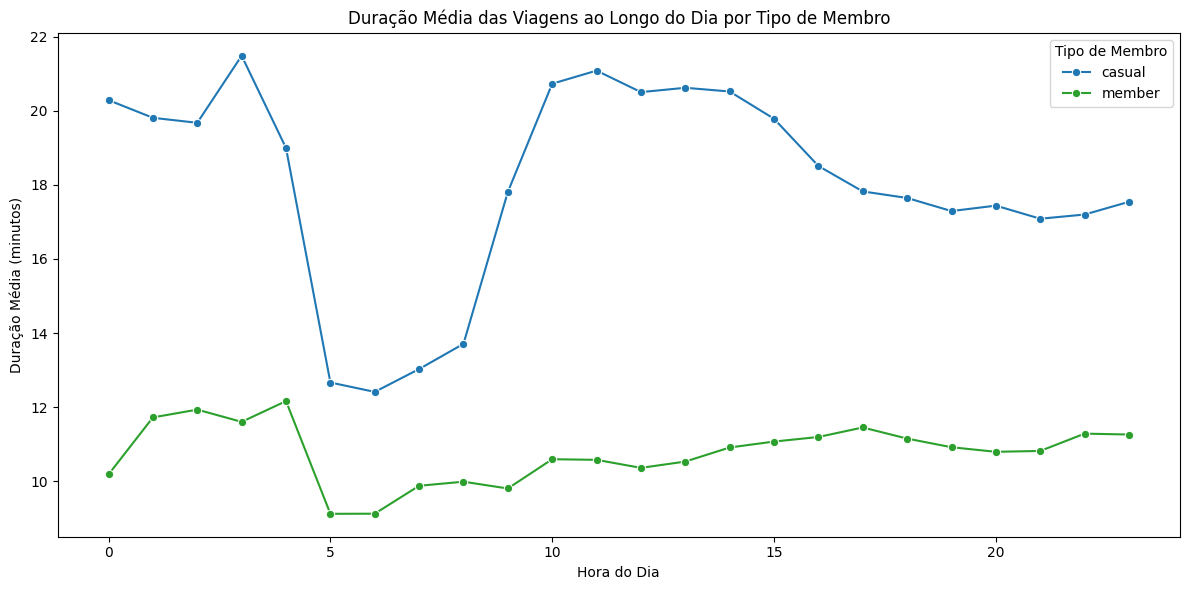

In [ ]:
#Desenho do gráfico
plt.figure(figsize=(12, 6))
plt.figure(figsize=(12, 6))
cores = {
    'member': '#2ca02c',  # verde
    'casual': '#1f77b4'   # azul
}

sns.lineplot(
    data=dfb3,
    x='hora_do_dia',
    y='duracao_media_min',
    hue='tipo_uso',
    marker='o',
    palette=cores,
    errorbar=None
)

plt.title('Duração Média das Viagens ao Longo do Dia por Tipo de Membro')
plt.xlabel('Hora do Dia')
plt.ylabel('Duração Média (minutos)')
plt.xticks(rotation=0)
plt.grid(False)
plt.legend(title='Tipo de Membro', loc='upper right')
plt.tight_layout()
plt.show()

Duração média por tipo de bike

In [ ]:
cm_4 = '/content/drive/MyDrive/Analises/2024/media_uso_bike.csv'
dfme4 = pd.read_csv(cm_4)
dfme4.columns.tolist()

['tipo_uso', 'rideable_type', 'duracao_media_min']

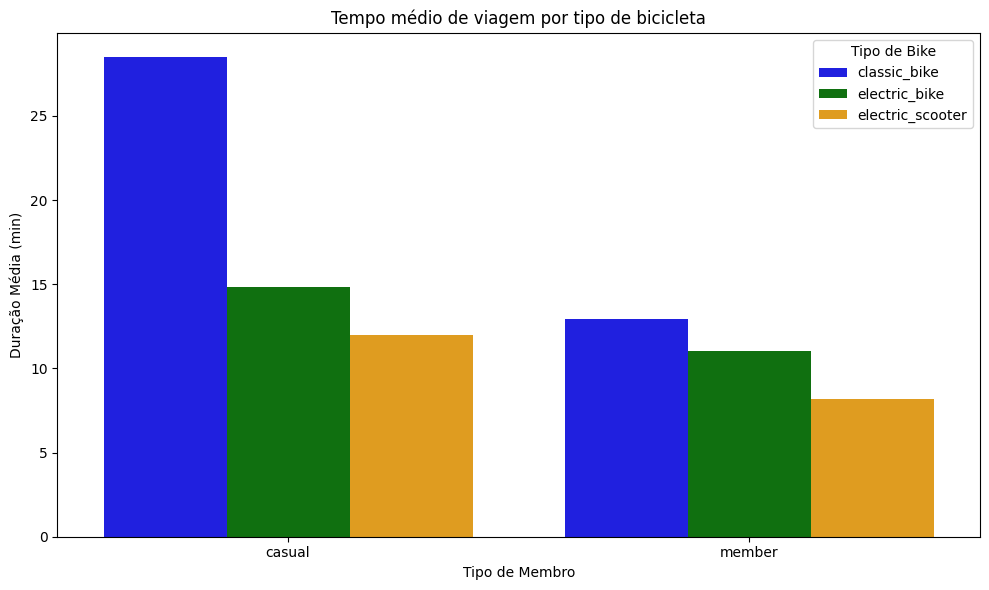

In [ ]:
plt.figure(figsize=(10, 6))

custom_palette = {
    'electric_bike': 'green',
    'electric_scooter': 'orange',
    'classic_bike': 'blue'
}

sns.barplot(
    data=dfme4,
    x='tipo_uso',
    y='duracao_media_min',
    hue='rideable_type',
    palette=custom_palette
)

plt.title('Tempo médio de viagem por tipo de bicicleta')
plt.xlabel('Tipo de Membro')
plt.ylabel('Duração Média (min)')
plt.legend(title='Tipo de Bike')
plt.tight_layout()
plt.show()

Meses de uso

In [ ]:
cm_meses4 = '/content/drive/MyDrive/Analises/2024/meses_uso.csv'
df_meses4 = pd.read_csv(cm_meses4)
df_meses4.columns.tolist()

import calendar

df_meses4['mes_nome'] = df_meses4['mes'].astype(int).apply(lambda x: calendar.month_abbr[x])
ordem_meses = list(calendar.month_abbr)[1:]

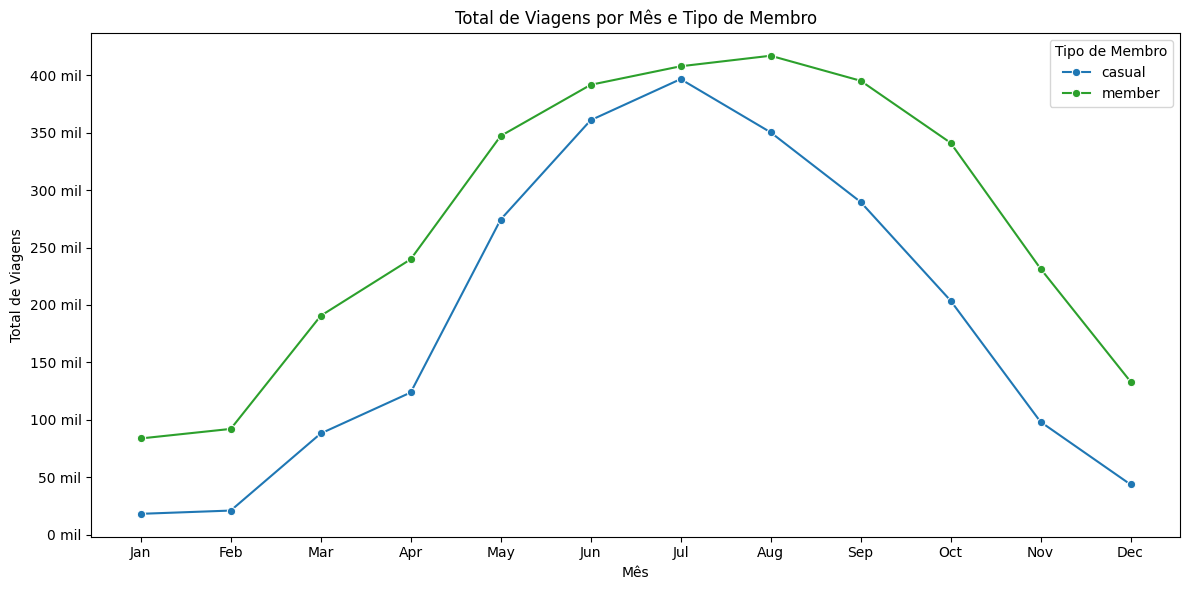

In [ ]:
#Desenho do gráfico
plt.figure(figsize=(12, 6))

sns.lineplot(
    data=df_meses4,
    x='mes_nome',
    y='total_viagens',
    hue='tipo_uso',
    marker='o',
    palette=cores,
    errorbar=None
)


plt.title('Total de Viagens por Mês e Tipo de Membro')
plt.xlabel('Mês')
plt.ylabel('Total de Viagens')
plt.xticks(rotation=0)
plt.grid(False)
plt.legend(title='Tipo de Membro', loc='upper right')
formatter = FuncFormatter(lambda x, _: f'{int(x/1000)} mil')
plt.gca().yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()

Viagens por tipo de bike

In [ ]:
cm_tipo2= '/content/drive/MyDrive/Analises/2024/tipo_bike.csv'
dft4 = pd.read_csv(cm_tipo2)
dft4.columns.tolist()

['rideable_type', 'tipo_uso', 'total']

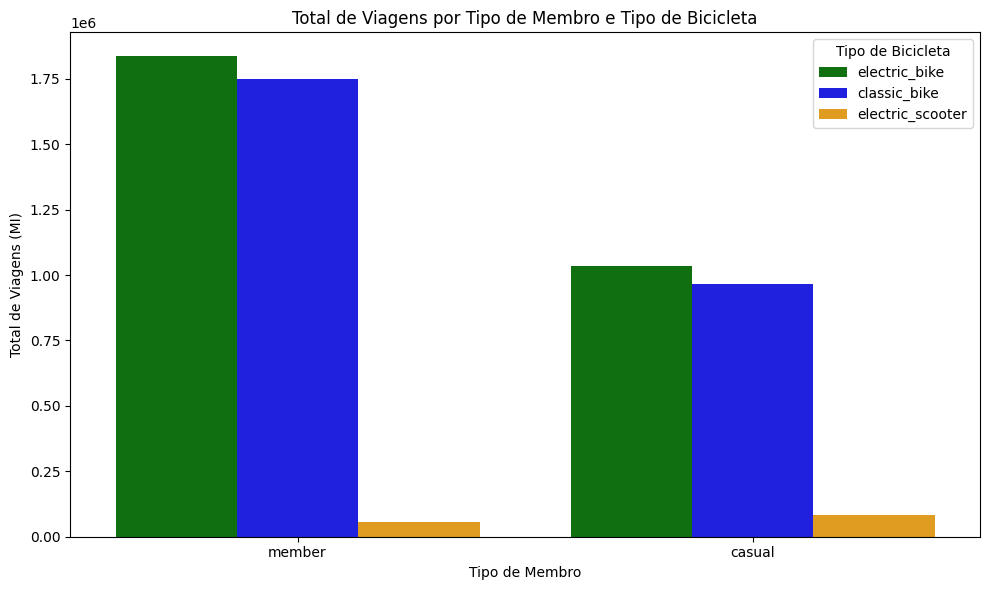

In [ ]:
plt.figure(figsize=(10, 6))

custom_palette = {
    'electric_bike': 'green',
    'electric_scooter': 'orange',
    'classic_bike': 'blue'
}
sns.barplot(
    data=dft4,
    x='tipo_uso',
    y='total',
    hue='rideable_type',
    palette=custom_palette
)

plt.title('Total de Viagens por Tipo de Membro e Tipo de Bicicleta')
plt.xlabel('Tipo de Membro')
plt.ylabel('Total de Viagens (MI)')
plt.legend(title='Tipo de Bicicleta', loc='upper right')
plt.tight_layout()
plt.show()

Dias da semana

In [ ]:
cms= '/content/drive/MyDrive/Analises/2024/dias_semana.csv'
dfs = pd.read_csv(cms)
dfs.columns.tolist()

['tipo_uso', 'dia_semana', 'total']

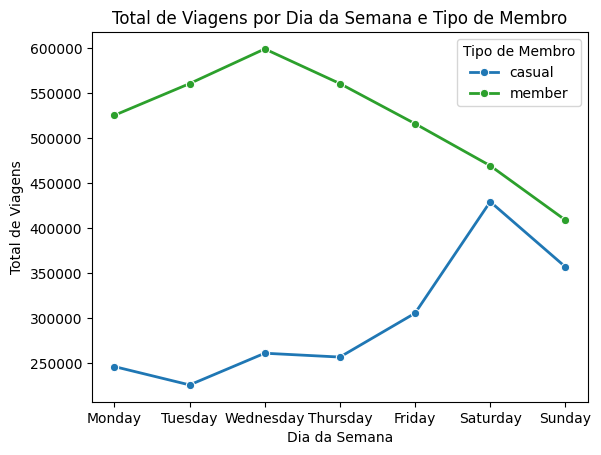

In [ ]:
#Desenho do gráfico
ordem_dias = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dfs['dia_semana'] = pd.Categorical(dfs['dia_semana'], categories=ordem_dias, ordered=True)
cores = {
    'member': '#2ca02c',  # verde
    'casual': '#1f77b4'   # azul
}


sns.lineplot(
    data=dfs,
    x='dia_semana',
    y='total',
    hue='tipo_uso',
    palette=cores,
    marker='o',
    linewidth=2,
    errorbar=None,
)
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x/1000:.0f}K'))
plt.title('Total de Viagens por Dia da Semana e Tipo de Membro')
plt.xlabel('Dia da Semana')
plt.ylabel('Total de Viagens')
plt.xticks(rotation=0)
plt.legend(title='Tipo de Membro')